In [1]:
import pandas as pd
from collections import defaultdict
import numpy as np

# Load the dataset
file_path = './Hotel Reservations Data.xlsx'
data = pd.read_excel(file_path)

# Rename the 'Check-in Time' and 'Check-out Time' columns
data.rename(columns={'Check-in Time': 'Check-in Date', 'Check-out Time': 'Check-out Date'}, inplace=True)

# Drop duplicate columns, if any
data = data.loc[:, ~data.columns.duplicated()]

# Convert Check-in and Check-out columns to datetime for easier manipulation
data['Check-in Date'] = pd.to_datetime(data['Check-in Date'])
data['Check-out Date'] = pd.to_datetime(data['Check-out Date'])

# Calculate walk-ins by finding records where the booking date matches the check-in date
data['Walk-In'] = data['Booking Date'] == data['Check-in Date']

# Initialize a dictionary to track room occupancy for each day
occupancy_dict = defaultdict(int)

# Iterate over each reservation and count room occupancy for the days the room was occupied
for index, row in data.iterrows():
    # Generate all dates between the check-in and the day before check-out
    occupancy_days = pd.date_range(start=row['Check-in Date'], end=row['Check-out Date'] - np.timedelta64(1, 'D'))
    for day in occupancy_days:
        occupancy_dict[day] += 1

# Convert the occupancy dictionary to a pandas DataFrame for easier visualization
occupancy_df = pd.DataFrame(list(occupancy_dict.items()), columns=['Date', 'Occupied Rooms'])

# List of columns to drop based on user's preference
columns_to_drop = [
    'Reservation ID', 'Guest ID', 'First Name', 'Last Name', 'Gender',
    'Email', 'Phone', 'Nationality', 'Birthdate', 'Address', 'City', 
    'Postal Code', 'Country', 'Payment Status', 'Special Requests', 
    'Reservation Source', 'Room Type Rate', 'Breakfast Included', 
    'Spa Package Included', 'Airport Pickup Included', 'Adults', 'Children'
]

# Drop the unnecessary columns from the original data
cleaned_data = data.drop(columns=columns_to_drop)

# Merge the cleaned data with the occupancy data based on the check-in dates
cleaned_data['Date'] = cleaned_data['Check-in Date']
combined_data = pd.merge(cleaned_data, occupancy_df, how='left', on='Date')

# Group the final data by Room Number and sort based on Check-in Date for each room's occupancy
final_data_cleaned = combined_data.sort_values(by=['Room Number', 'Check-in Date'])

# Now we create the new table that records the number of occupied rooms of each type every day
room_type_occupancy = final_data_cleaned.groupby(['Date', 'Room Type'])['Room Number'].count().reset_index()

# Rename the columns for clarity
room_type_occupancy.rename(columns={'Room Number': 'Occupied Rooms'}, inplace=True)

# Pivot the table to show dates as rows and room types as columns, with the count of occupied rooms as the values
room_type_occupancy_pivot = room_type_occupancy.pivot(index='Date', columns='Room Type', values='Occupied Rooms').fillna(0)

# Display the resulting table
print(room_type_occupancy_pivot)

# Optionally, you can save the resulting table to an Excel file
# room_type_occupancy_pivot.to_excel('Room_Type_Occupancy.xlsx', index=True)


Room Type   Deluxe  Standard  Suite
Date                               
2022-01-06     0.0       1.0    0.0
2022-01-08     0.0       1.0    0.0
2022-01-09     2.0       1.0    0.0
2022-01-10     1.0       1.0    1.0
2022-01-11     1.0       2.0    0.0
...            ...       ...    ...
2024-02-01     3.0       1.0    1.0
2024-02-02     0.0       2.0    1.0
2024-02-03     1.0       1.0    1.0
2024-02-04     1.0       0.0    1.0
2024-02-06     3.0       1.0    1.0

[760 rows x 3 columns]


In [6]:
import pandas as pd

# Assuming 'final_data_cleaned' contains the cleaned data with room occupancy information.

# Group by 'Date' and 'Room Type' to count the number of occupied rooms for each type on each date
room_type_occupancy = final_data_cleaned.groupby(['Date', 'Room Type'])['Room Number'].count().reset_index()

# Rename the columns for clarity
room_type_occupancy.rename(columns={'Room Number': 'Occupied Rooms'}, inplace=True)

# Pivot the table to show dates as rows and room types as columns, with the count of occupied rooms as the values
room_type_occupancy_pivot = room_type_occupancy.pivot(index='Date', columns='Room Type', values='Occupied Rooms').fillna(0)

# Display the resulting table
print(room_type_occupancy_pivot)

# Optionally, you can save the resulting table to an Excel file
# room_type_occupancy_pivot.to_excel('Room_Type_Occupancy.xlsx', index=True)


Room Type   Deluxe  Standard  Suite
Date                               
2022-01-06     0.0       1.0    0.0
2022-01-08     0.0       1.0    0.0
2022-01-09     2.0       1.0    0.0
2022-01-10     1.0       1.0    1.0
2022-01-11     1.0       2.0    0.0
...            ...       ...    ...
2024-02-01     3.0       1.0    1.0
2024-02-02     0.0       2.0    1.0
2024-02-03     1.0       1.0    1.0
2024-02-04     1.0       0.0    1.0
2024-02-06     3.0       1.0    1.0

[760 rows x 3 columns]


In [9]:
# Save the two tables as CSV files

# Save the room type occupancy by day as 'GPT_room_day.csv'
room_type_occupancy_pivot.to_csv('GPT_room_day.csv', index=True)

# Save the full room occupancy data as 'GPT_room_summary.csv'
final_data_cleaned.to_csv('GPT_room_summary.csv', index=False)
# Creating separate tables for each room type

# Filter the data to create three tables, one for each room type
deluxe_rooms = final_data_cleaned[final_data_cleaned['Room Type'] == 'Deluxe']
standard_rooms = final_data_cleaned[final_data_cleaned['Room Type'] == 'Standard']
suite_rooms = final_data_cleaned[final_data_cleaned['Room Type'] == 'Suite']

# Save each table as a CSV file
deluxe_rooms.to_csv('Deluxe_Rooms.csv', index=False)
standard_rooms.to_csv('Standard_Rooms.csv', index=False)
suite_rooms.to_csv('Suite_Rooms.csv', index=False)


In [14]:
# Filter the data for Standard rooms between 2022-06-01 and 2022-09-30
standard_rooms_summer = standard_rooms[(standard_rooms['Date'] >= '2022-06-01') & (standard_rooms['Date'] <= '2022-09-30')]

# Display the filtered data
standard_rooms_summer.to_csv('Standard_Rooms_Summer.csv', index=False)
# Dropping the specified columns from the filtered data
columns_to_drop_summer = ['Room Number', 'Floor Number', 'Occupied Rooms', 'Room Type']
standard_rooms_summer_cleaned = standard_rooms_summer.drop(columns=columns_to_drop_summer)

# Display the cleaned data
standard_rooms_summer_cleaned.head()


,Check-in Date,Check-out Date,Total Nights,Total Amount,Booking Date,Walk-In,Date
3864,2022-06-12,2022-06-15,3,267,2022-05-24,False,2022-06-12
3679,2022-06-18,2022-06-19,1,89,2022-05-23,False,2022-06-18
1687,2022-07-02,2022-07-06,4,316,2022-05-25,False,2022-07-02
3004,2022-07-07,2022-07-09,2,132,2022-06-18,False,2022-07-07
82,2022-07-15,2022-07-20,5,325,2022-06-14,False,2022-07-15
...,...,...,...,...,...,...,...
1248,2022-08-14,2022-08-18,4,284,2022-07-17,False,2022-08-14
2690,2022-08-19,2022-08-23,4,336,2022-07-18,False,2022-08-19
285,2022-09-06,2022-09-11,5,350,2022-09-01,False,2022-09-06
4085,2022-09-18,2022-09-22,4,316,2022-09-08,False,2022-09-18


In [21]:
import pandas as pd
from collections import defaultdict

# Ensure that the dates are properly formatted
standard_rooms_summer_cleaned['Check-in Date'] = pd.to_datetime(standard_rooms_summer_cleaned['Check-in Date'], errors='coerce')
standard_rooms_summer_cleaned['Check-out Date'] = pd.to_datetime(standard_rooms_summer_cleaned['Check-out Date'], errors='coerce')

# Step 1: Calculate daily check-ins
check_ins_per_day = standard_rooms_summer_cleaned.groupby('Check-in Date').size().reset_index(name='Check-ins')

# Step 2: Calculate daily check-outs
check_outs_per_day = standard_rooms_summer_cleaned.groupby('Check-out Date').size().reset_index(name='Check-outs')

# Step 3: Calculate the number of occupied rooms per day
daily_occupancy = defaultdict(int)

# Iterate over each row and fill in the occupancy for each day the room is occupied
for index, row in standard_rooms_summer_cleaned.iterrows():
    occupancy_days = pd.date_range(start=row['Check-in Date'], end=row['Check-out Date'] - pd.Timedelta(days=1))
    for day in occupancy_days:
        daily_occupancy[day] += 1

# Convert the occupancy dictionary to a pandas DataFrame
occupancy_per_day = pd.DataFrame(list(daily_occupancy.items()), columns=['Date', 'Occupancy'])

# Merging check-ins, check-outs, and occupancy data
summary = pd.merge(check_ins_per_day, check_outs_per_day, left_on='Check-in Date', right_on='Check-out Date', how='outer').rename(columns={'Check-in Date': 'Date'})
summary = pd.merge(summary, occupancy_per_day, how='outer', on='Date').fillna(0)

# Filter out any invalid dates (like 1970) and handle missing dates correctly
summary['Date'] = pd.to_datetime(summary['Date'], errors='coerce')
summary = summary.dropna(subset=['Date'])  # Remove rows with invalid dates

# Sorting the final summary by Date
summary = summary.sort_values(by='Date')

# Removing rows with invalid dates such as 1970 by filtering out NaT values in the Date column
summary = summary.dropna(subset=['Date'])  # Remove rows with invalid dates (NaT)

# Sorting the final summary by Date
summary = summary.sort_values(by='Date')

# Display the cleaned and sorted summary
summary.head()

summary.to_csv('Standard_Rooms_Summer_summary.csv', index=False)

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, geom

# Parameters
p = 1 / 4  # Probability to cancel before check-in
p_0 = 1 / 10  # Probability to cancel on check-in day
q = 1 / 2  # Probability for occupancy duration
num_rooms = 33  # Number of standard rooms

# Function to generate reservation arrivals using the Poisson process
# Adding the cancellation stage based on uniform distribution over [k-30, k]
def generate_reservation_arrivals(k, t_start, num_rooms, p, p_0, q):
    reservations = []
    for t in range(t_start, k):
        lambda_t = 35 / ((k - t) / 30 * p + p_0) * (k - t) / 30 / (1 - q)
        # Number of reservation arrivals for day t
        arrivals = poisson.rvs(lambda_t)
        
        for _ in range(arrivals):
            # Simulate if reservation gets cancelled over the interval [t, k]
            cancellation_prob = p * (k - t) / 30
            if np.random.rand() < cancellation_prob:
                cancellation_time = t + np.random.uniform(0, k - t)  # Record the cancellation timing
                reservation_info = {
                    'Reservation Day': t,
                    'Check-in Day': k,
                    'Cancellation Time': cancellation_time,
                    'Status': 'Cancelled'
                }
                reservations.append(reservation_info)
                continue  # Reservation is cancelled
            
            # Simulate occupancy duration using geometric distribution
            occupancy_duration = geom.rvs(q)  # Occupancy duration
            reservation_info = {
                'Reservation Day': t,
                'Check-in Day': k,
                'Occupancy Duration': occupancy_duration,
                'Status': 'Checked-in'
            }
            reservations.append(reservation_info)
    return reservations

# Generate the reservations for k = 1 to 90
all_reservations = []
for k in range(1, 91):
    reservations_k = generate_reservation_arrivals(k, max(1, k-30), num_rooms, p, p_0, q)
    all_reservations.extend(reservations_k)

# Convert the results to a DataFrame
reservation_df_all = pd.DataFrame(all_reservations)

# Display the first few rows of the generated reservations
print(reservation_df_all.head())

   Reservation Day  Check-in Day  Occupancy Duration      Status  \
0                1             2                 4.0  Checked-in   
1                1             2                 1.0  Checked-in   
2                1             2                 3.0  Checked-in   
3                1             2                 2.0  Checked-in   
4                1             2                 1.0  Checked-in   

   Cancellation Time  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


In [27]:
import numpy as np
import pandas as pd
from scipy.stats import poisson

# Parameters
p_0 = 1 / 10  # Probability to cancel upon arrival for reservations
mean_walkin_arrivals = 5  # Mean of walk-in arrivals each day
time_points = np.linspace(0, 1, 100)  # Time normalized to [0, 1]

# Generate the density function similar to the provided figure
# Let's assume it's a symmetric density similar to a normal distribution curve for simplicity
walkin_density = 3 * time_points * (1 - time_points)  # A parabola-like curve

# Function to generate the time-varying Poisson flow for walk-ins and reservations
def generate_checkin_flow(k, B_k, p_0, mean_walkin_arrivals, walkin_density, time_points):
    np.random.seed(k)  # For reproducibility per day k
    
    # Generate walk-in arrivals based on Poisson process with time-varying rate
    walkin_arrivals = []
    for i, rate in enumerate(walkin_density):
        time_interval = time_points[i]
        num_arrivals = poisson.rvs(mean_walkin_arrivals * rate)
        walkin_arrivals.extend([time_interval] * num_arrivals)
    
    # Generate reservation arrivals and check-in/cancellation process
    reservation_arrivals = []
    for _ in range(B_k):
        # Sample an arrival time from the given distribution
        arrival_time = np.random.choice(time_points, p=walkin_density / walkin_density.sum())
        
        # Determine whether the reservation checks in or cancels
        if np.random.rand() > p_0:
            reservation_status = 'Checked-in'
        else:
            reservation_status = 'Cancelled'
        
        reservation_arrivals.append({'Arrival Time': arrival_time, 'Status': reservation_status})
    
    return walkin_arrivals, reservation_arrivals

# Generate check-in flow for k = 1 to 90
all_days_data = []
for k in range(1, 91):
    B_k = 10  # Assume 10 accepted reservations for simplicity
    walkin_arrivals, reservation_arrivals = generate_checkin_flow(k, B_k, p_0, mean_walkin_arrivals, walkin_density, time_points)
    
    # Create data for day k
    for arrival in walkin_arrivals:
        all_days_data.append({'Day': k, 'Type': 'Walk-in', 'Arrival Time': arrival})
    for reservation in reservation_arrivals:
        all_days_data.append({'Day': k, 'Type': 'Reservation', 'Arrival Time': reservation['Arrival Time'], 'Status': reservation['Status']})

# Convert the results to a DataFrame
checkin_flow_df = pd.DataFrame(all_days_data)

# Display the first few rows of the generated check-in flow
# Correcting the DataFrame creation to include the "Status" for walk-ins
all_days_data_corrected = []
for k in range(1, 91):
    B_k = 10  # Assume 10 accepted reservations for simplicity
    walkin_arrivals, reservation_arrivals = generate_checkin_flow(k, B_k, p_0, mean_walkin_arrivals, walkin_density, time_points)
    
    # Create data for day k
    for arrival in walkin_arrivals:
        all_days_data_corrected.append({'Day': k, 'Type': 'Walk-in', 'Arrival Time': arrival, 'Status': 'Checked-in'})
    for reservation in reservation_arrivals:
        all_days_data_corrected.append({'Day': k, 'Type': 'Reservation', 'Arrival Time': reservation['Arrival Time'], 'Status': reservation['Status']})

# Convert the corrected results to a DataFrame
checkin_flow_df_corrected = pd.DataFrame(all_days_data_corrected)

# Display the first few rows of the corrected check-in flow
checkin_flow_df_corrected.head()

,Day,Type,Arrival Time,Status
0,1,Walk-in,0.080808,Checked-in
1,1,Walk-in,0.090909,Checked-in
2,1,Walk-in,0.101010,Checked-in
3,1,Walk-in,0.111111,Checked-in
4,1,Walk-in,0.121212,Checked-in
...,...,...,...,...
22833,90,Reservation,0.333333,Checked-in
22834,90,Reservation,0.686869,Cancelled
22835,90,Reservation,0.848485,Checked-in
22836,90,Reservation,0.555556,Checked-in


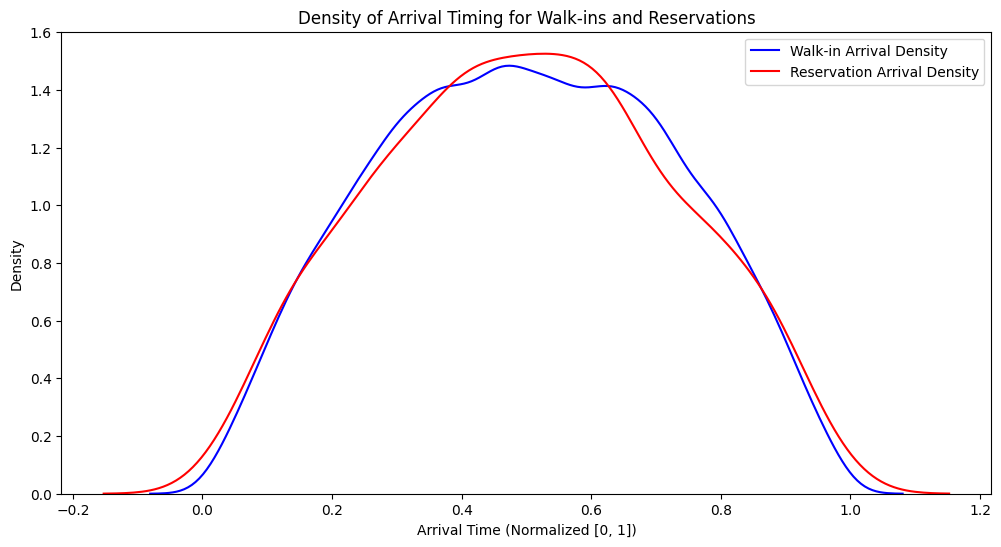

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract arrival times for walk-ins and reservations
walkin_times = checkin_flow_df_corrected[checkin_flow_df_corrected['Type'] == 'Walk-in']['Arrival Time']
reservation_times = checkin_flow_df_corrected[checkin_flow_df_corrected['Type'] == 'Reservation']['Arrival Time']

# Plot the densities
plt.figure(figsize=(12, 6))

# Plot density for walk-ins
sns.kdeplot(walkin_times, label='Walk-in Arrival Density', color='blue')

# Plot density for reservations
sns.kdeplot(reservation_times, label='Reservation Arrival Density', color='red')

# Set labels and title
plt.xlabel('Arrival Time (Normalized [0, 1])')
plt.ylabel('Density')
plt.title('Density of Arrival Timing for Walk-ins and Reservations')
plt.legend()

# Display the plot
plt.show()


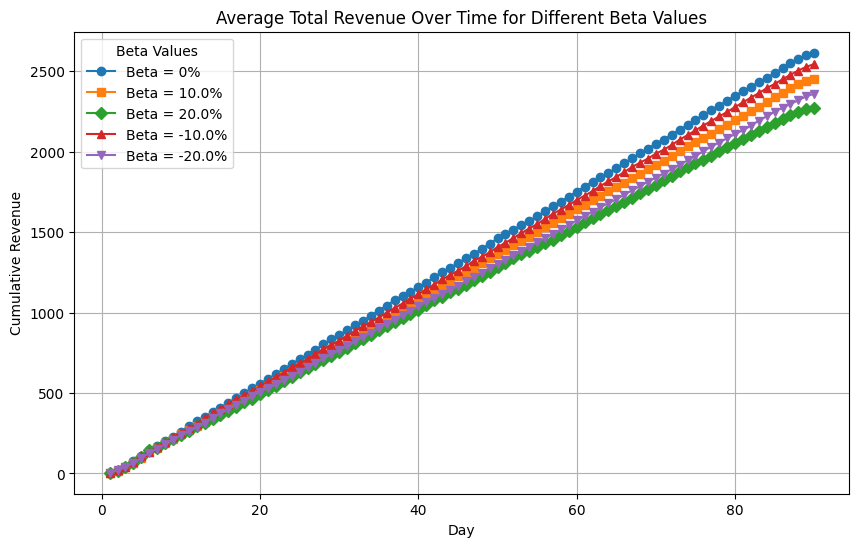

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, geom
import matplotlib.pyplot as plt

# Parameters
p = 1 / 3  # Probability to cancel before check-in
p_0 = 1 / 10  # Probability to cancel on check-in day
q = 1 / 2  # Geometric distribution parameter for occupancy duration
num_rooms = 33  # Number of standard rooms
beta_values = [0, 0.1, 0.2, -0.1, -0.2]  # Error levels for baseline algorithms
simulation_days = 90  # Total days to simulate
r = 1  # Reward per occupied room per day
l = 2  # Penalty for rejected reservations at check-in
num_repeats = 10  # Number of repetitions for averaging

# Function to generate reservation arrivals
def generate_reservation_arrivals(num_rooms, p, p_0, q, beta=0):
    all_reservations = []
    rooms_state = {day: {'accepted': []} for day in range(1, simulation_days + 31)}  # Extend beyond simulation_days

    for t in range(1, simulation_days + 1):
        for day in range(t, simulation_days + 31):
            rooms_state[day]['accepted'] = [
                res for res in rooms_state[day]['accepted']
                if not (res['Cancelled Before Check-in'] and res['Cancellation Time'] <= t)
            ]

        for k in range(t + 1, min(t + 31, simulation_days + 1)):
            delta = k - t
            denominator_lambda = 1 - (p + p_0)
            lambda_t = (40 / denominator_lambda) * (1 / 30) * (1 / (1 - q))
            arrivals = poisson.rvs(mu=lambda_t)

            for _ in range(arrivals):
                occupancy_duration = geom.rvs(q)
                stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))

                cumulative_cancellation_prob = p * (delta / 30)
                is_cancelled_before_checkin = np.random.rand() < cumulative_cancellation_prob
                cancellation_time = None
                is_cancelled_on_checkin = False
                if is_cancelled_before_checkin:
                    cancellation_time = t + np.random.uniform(0, delta)
                else:
                    is_cancelled_on_checkin = np.random.rand() < p_0
                    if is_cancelled_on_checkin:
                        cancellation_time = k

                accepted_reservations_k = len(rooms_state[k]['accepted'])
                denominator = 1 - p - p_0
                acceptance_threshold = num_rooms * (1 - q) / denominator * (1 + beta)

                if accepted_reservations_k < acceptance_threshold:
                    reservation_status = 'Accepted'
                    reservation_details = {
                        'Reservation Day': t,
                        'Check-in Day': k,
                        'Stay Days': stay_days,
                        'Occupancy Duration': occupancy_duration,
                        'Cancelled Before Check-in': is_cancelled_before_checkin,
                        'Cancelled On Check-in': is_cancelled_on_checkin,
                        'Cancellation Time': cancellation_time,
                        'Status': 'Accepted'
                    }
                    for day in stay_days:
                        if day >= t:
                            rooms_state[day]['accepted'].append(reservation_details)
                else:
                    reservation_status = 'Rejected in Stage I'

                reservation_info = {
                    'Reservation Day': t,
                    'Check-in Day': k,
                    'Occupancy Duration': occupancy_duration,
                    'Cancelled Before Check-in': is_cancelled_before_checkin,
                    'Cancelled On Check-in': is_cancelled_on_checkin,
                    'Cancellation Time': cancellation_time,
                    'Status': reservation_status
                }
                all_reservations.append(reservation_info)

    reservations_df = pd.DataFrame(all_reservations)
    return reservations_df

# Function to simulate the check-in process, handle walk-ins, and calculate revenue
def simulate_checkin_stage(reservations_df, num_rooms):
    all_days_data = []
    rooms_state = {day: {'occupied': 0} for day in range(1, simulation_days + 1)}
    total_revenue = []
    cumulative_revenue = 0  # To keep track of revenue over time

    for k in range(1, simulation_days + 1):
        day_revenue = 0  # Revenue for day k
        day_reservations = reservations_df[
            (reservations_df['Check-in Day'] == k) &
            (reservations_df['Status'] == 'Accepted') &
            (reservations_df['Cancelled Before Check-in'] == False)
        ].copy()  # Copy to avoid SettingWithCopyWarning

        day_reservations['Final Status'] = day_reservations.apply(
            lambda row: 'Cancelled' if (row['Cancelled On Check-in']) else 'Checked-in', axis=1
        )

        checked_in_reservations = day_reservations[day_reservations['Final Status'] == 'Checked-in']

        for _, reservation in checked_in_reservations.iterrows():
            occupancy_duration = reservation['Occupancy Duration']
            stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))
            room_allocated = True
            for day in stay_days:
                if rooms_state[day]['occupied'] >= num_rooms:
                    room_allocated = False
                    break
            if room_allocated:
                for day in stay_days:
                    rooms_state[day]['occupied'] += 1
                    day_revenue += r  # Add revenue for each occupied room per day
                reservation_status = 'Checked-in'
            else:
                reservation_status = 'Rejected in Stage II'
                day_revenue -= l  # Subtract penalty for rejection
            all_days_data.append({
                'Day': k,
                'Type': 'Reservation',
                'Status': reservation_status
            })

        idle_rooms = num_rooms - rooms_state[k]['occupied']
        num_walkins_potential = poisson.rvs(mu=5)
        num_walkins = min(idle_rooms, num_walkins_potential)
        for _ in range(num_walkins):
            rooms_state[k]['occupied'] += 1
            day_revenue += r  # Add revenue for occupied room
            all_days_data.append({
                'Day': k,
                'Type': 'Walk-in',
                'Status': 'Checked-in'
            })
        for _ in range(num_walkins_potential - num_walkins):
            day_revenue -= l  # Subtract penalty for rejection
            all_days_data.append({
                'Day': k,
                'Type': 'Walk-in',
                'Status': 'Rejected in Stage II'
            })

        cumulative_revenue += day_revenue
        total_revenue.append({'Day': k, 'Revenue': cumulative_revenue})

    checkin_flow_df = pd.DataFrame(all_days_data)
    revenue_df = pd.DataFrame(total_revenue)
    return checkin_flow_df, revenue_df

# Simulate multiple repetitions and average results
def average_revenue_over_repeats(num_repeats, beta):
    cumulative_revenues = []

    for _ in range(num_repeats):
        reservations_df = generate_reservation_arrivals(num_rooms, p, p_0, q, beta)
        _, revenue_df = simulate_checkin_stage(reservations_df, num_rooms)
        cumulative_revenues.append(revenue_df['Revenue'].values)

    # Compute the average revenue over the repetitions
    average_revenue = np.mean(cumulative_revenues, axis=0)
    return average_revenue

# Markers for plotting
markers = ['o', 's', 'D', '^', 'v']  # Different shapes for each beta

# Plot all revenue results in the same figure after averaging
plt.figure(figsize=(10, 6))
for i, beta in enumerate(beta_values):
    average_revenue = average_revenue_over_repeats(num_repeats, beta)
    plt.plot(range(1, simulation_days + 1), average_revenue, label=f'Beta = {beta * 100}%', marker=markers[i])

plt.title('Average Total Revenue Over Time for Different Beta Values')
plt.xlabel('Day')
plt.ylabel('Cumulative Revenue')
plt.legend(title='Beta Values')
plt.grid(True)
plt.show()


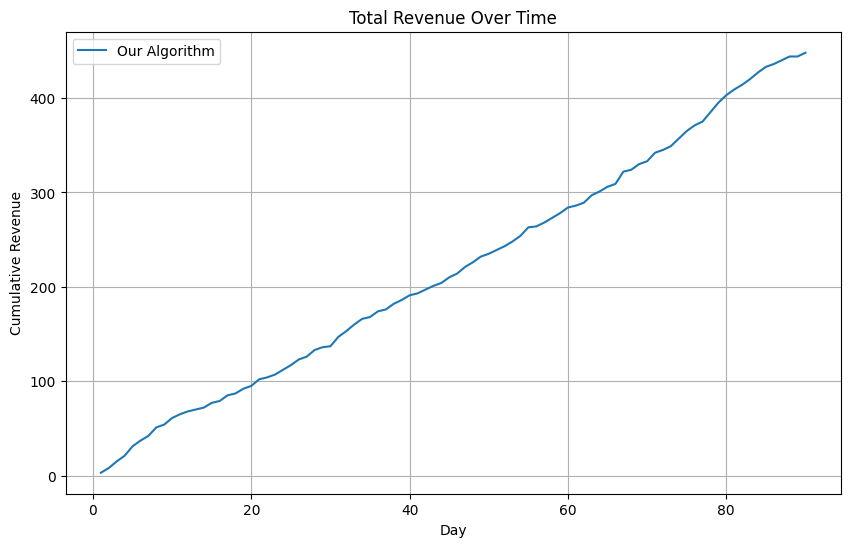

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, geom
import matplotlib.pyplot as plt

# Parameters
T = 90  # Total number of days
C = 33  # Total number of rooms
iota = np.log(C * T)  # Iota calculation
p = 1 / 3  # Probability to cancel before check-in
p_0 = 1 / 10  # Probability to cancel on check-in day
q = 1 / 2  # Occupancy duration probability
alpha = 2  # Alpha parameter in check-in stage
mean_walkins_per_day = 5  # Mean number of walk-ins per day
t_0 = 0.5  # Confirmation call timing (e.g., halfway through the day)
simulation_days = T  # Total days to simulate
r = 1  # Reward per occupied room per day
l = 2  # Penalty for rejected reservations at check-in

# Function to generate reservation arrivals and process reservation stage
def reservation_stage():
    all_reservations = []
    # Initialize rooms_state with a list of active reservations for each day
    rooms_state = {k: {'accepted_reservations': []} for k in range(1, simulation_days + 31)}

    for t in range(1, simulation_days + 1):
        # Process cancellations at time t
        for k in range(t, simulation_days + 31):
            # Remove reservations canceled at or before time t
            rooms_state[k]['accepted_reservations'] = [
                res for res in rooms_state[k]['accepted_reservations']
                if not (res['Cancelled Before Check-in'] and res['Cancellation Time'] <= t)
            ]

        for k in range(t + 1, min(t + 31, simulation_days + 1)):
            delta = k - t
            # Arrival rates (Poisson process with lambda similar to baseline)
            lambda_tk = (40 / ((delta * p / 30) + p_0)) * (1 / 30) * (1 / (1 - q))  # Based on the baseline formula
            arrivals = poisson.rvs(mu=lambda_tk)

            for _ in range(arrivals):
                # Calculate B_t_k: Number of currently accepted and active reservations for day k
                B_t_k = len(rooms_state[k]['accepted_reservations'])

                # Compute LHS
                delta_p = (delta * p) / 30
                cancel_prob = delta_p + p_0
                one_minus_cancel_prob = 1 - cancel_prob
                term1 = one_minus_cancel_prob * B_t_k
                term2 = (iota * cancel_prob) / 3
                sqrt_term = np.sqrt((term2) ** 2 + 2 * iota * B_t_k * one_minus_cancel_prob * cancel_prob)
                LHS = term1 + term2 + sqrt_term

                # Compute RHS
                one_minus_q = 1 - q
                term3 = (iota * one_minus_q) / 3
                sqrt_term_rhs = np.sqrt((one_minus_q / 3) ** 2 + 2 * iota * C * q * one_minus_q)
                RHS = one_minus_q * C - term3 - sqrt_term_rhs

                # Acceptance Decision

                # accepted_reservations_k = len(rooms_state[k]['accepted_reservations'])
                # denominator = 1 - p - p_0
                # acceptance_threshold = num_rooms * (1 - q) / denominator * (1 + beta)

                # if accepted_reservations_k < acceptance_threshold:
                    # Accept the reservation
                if LHS > RHS:
                    reservation_status = 'Accepted'
                else:
                    reservation_status = 'Rejected in Stage I'

                # Simulate cancellation before check-in
                cumulative_cancellation_prob = p * (delta / 30)
                is_cancelled_before_checkin = np.random.rand() < cumulative_cancellation_prob
                cancellation_time = None
                is_cancelled_on_checkin = False
                if is_cancelled_before_checkin:
                    cancellation_time = t + np.random.uniform(0, delta)
                else:
                    # Simulate cancellation on check-in day
                    is_cancelled_on_checkin = np.random.rand() < p_0
                    if is_cancelled_on_checkin:
                        cancellation_time = k

                # Simulate occupancy duration using geometric distribution (same as baseline)
                occupancy_duration = geom.rvs(q)

                # Record the reservation
                reservation_info = {
                    'Reservation Day': t,
                    'Check-in Day': k,
                    'Occupancy Duration': occupancy_duration,
                    'Cancelled Before Check-in': is_cancelled_before_checkin,
                    'Cancelled On Check-in': is_cancelled_on_checkin,
                    'Cancellation Time': cancellation_time,
                    'Status': reservation_status,
                    'Checked-in': False  # To track if the reservation has been checked in
                }

                if reservation_status == 'Accepted':
                    # Add reservation to rooms_state for future cancellations and capacity checks
                    rooms_state[k]['accepted_reservations'].append(reservation_info)

                all_reservations.append(reservation_info)

    reservations_df = pd.DataFrame(all_reservations)
    return reservations_df, rooms_state

# Function to simulate the check-in process, handle walk-ins, and calculate revenue
def checkin_stage(reservations_df, rooms_state):
    total_revenue = []
    cumulative_revenue = 0  # To keep track of revenue over time
    rooms_occupied = {k: 0 for k in range(1, simulation_days + 1)}
    for k in range(1, simulation_days + 1):
        day_revenue = 0  # Revenue for day k
        # Get reservations for day k
        day_reservations = reservations_df[
            (reservations_df['Check-in Day'] == k) &
            (reservations_df['Status'] == 'Accepted') &
            (~reservations_df['Cancelled Before Check-in'])
        ].copy()

        # Handle cancellations on check-in day
        day_reservations['Final Status'] = day_reservations.apply(
            lambda row: 'Cancelled' if row['Cancelled On Check-in'] else 'Pending', axis=1)

        # Initialize variables for check-in process
        walkin_times = np.sort(np.random.uniform(0, 1, poisson.rvs(mu=mean_walkins_per_day)))
        walkin_index = 0
        t = 0
        t_first_t0 = True  # To check if it's the first time t >= t_0

        # Process walk-ins and reservations
        while t <= 1:
            if walkin_index < len(walkin_times):
                t = walkin_times[walkin_index]
            else:
                t = 1  # No more walk-ins, set t to end of the day

            if t < t_0:
                # Check in reservations up to time t
                pending_reservations = day_reservations[
                    (day_reservations['Final Status'] == 'Pending') &
                    (~day_reservations['Checked-in'])
                ]
                for idx, res in pending_reservations.iterrows():
                    day_reservations.at[idx, 'Checked-in'] = True
                    occupancy_duration = res['Occupancy Duration']
                    stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))
                    for day in stay_days:
                        rooms_occupied[day] += 1
                        day_revenue += r  # Add revenue for occupied room
                # Update available rooms
                x = C - rooms_occupied[k]
                # Expected remaining walk-ins
                L = mean_walkins_per_day * (1 - t)
                # Decide whether to accept current walk-in
                if x > alpha * L:
                    # Accept walk-in
                    rooms_occupied[k] += 1
                    day_revenue += r
                else:
                    # Reject walk-in
                    day_revenue -= l
                walkin_index += 1
            else:
                if t_first_t0:
                    # First time t >= t_0
                    # Check in all remaining reservations
                    pending_reservations = day_reservations[
                        (day_reservations['Final Status'] == 'Pending') &
                        (~day_reservations['Checked-in'])
                    ]
                    for idx, res in pending_reservations.iterrows():
                        day_reservations.at[idx, 'Checked-in'] = True
                        occupancy_duration = res['Occupancy Duration']
                        stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))
                        for day in stay_days:
                            rooms_occupied[day] += 1
                            day_revenue += r  # Add revenue for occupied room
                    t_first_t0 = False
                # Accept walk-ins until rooms are occupied
                while rooms_occupied[k] < C and walkin_index < len(walkin_times):
                    # Accept walk-in
                    rooms_occupied[k] += 1
                    day_revenue += r
                    walkin_index += 1
                # Reject remaining walk-ins
                remaining_walkins = len(walkin_times) - walkin_index
                day_revenue -= l * remaining_walkins
                break  # Rooms are full or no more walk-ins
            t += 0.01  # Move time forward to prevent infinite loop

        cumulative_revenue += day_revenue
        total_revenue.append({'Day': k, 'Revenue': cumulative_revenue})

    revenue_df = pd.DataFrame(total_revenue)
    return revenue_df

# Run the simulation
reservations_df, rooms_state = reservation_stage()
revenue_df = checkin_stage(reservations_df, rooms_state)

# Plot the cumulative revenue over time
plt.figure(figsize=(10, 6))
plt.plot(revenue_df['Day'], revenue_df['Revenue'], label='Our Algorithm')
plt.title('Total Revenue Over Time')
plt.xlabel('Day')
plt.ylabel('Cumulative Revenue')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, geom
import matplotlib.pyplot as plt

# Parameters
p = 1 / 3  # Probability to cancel before check-in
p_0 = 1 / 10  # Probability to cancel on check-in day
q = 1 / 2  # Geometric distribution parameter for occupancy duration
num_rooms = C = 400  # Number of standard rooms
beta_values = [0, 0.1, 0.2, -0.1, -0.2]  # Error levels for baseline algorithms
simulation_days = T = 90  # Total days to simulate
r = 1  # Reward per occupied room per day
l = 2  # Penalty for rejected reservations at check-in
mean_walkins_per_day = 5  # Mean number of walk-ins per day
t_0 = 0.5  # Confirmation call timing
alpha = 2  # Alpha parameter in check-in stage
num_repeats = 10  # Number of repetitions for averaging
iota = np.log(C * T)  # Iota calculation

# Function to generate reservation arrivals for baselines
def generate_reservation_arrivals_baseline(num_rooms, p, p_0, q, beta=0):
    all_reservations = []
    rooms_state = {day: {'accepted': []} for day in range(1, simulation_days + 31)}

    for t in range(1, simulation_days + 1):
        # Process cancellations at time t
        for day in range(t, simulation_days + 31):
            rooms_state[day]['accepted'] = [
                res for res in rooms_state[day]['accepted']
                if not (res['Cancelled Before Check-in'] and res['Cancellation Time'] <= t)
            ]

        # Process new reservations arriving at time t
        for k in range(t + 1, min(t + 31, simulation_days + 1)):
            delta = k - t
            denominator_lambda = 1 - (p + p_0)
            lambda_t = ((C+10) / denominator_lambda) * (1 / 30) * (1 / (1 - q))
            arrivals = poisson.rvs(mu=lambda_t)

            for _ in range(arrivals):
                # Simulate occupancy duration
                occupancy_duration = geom.rvs(q)
                stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))

                # Determine cancellation probabilities
                cumulative_cancellation_prob = p * (delta / 30)
                is_cancelled_before_checkin = np.random.rand() < cumulative_cancellation_prob
                cancellation_time = None
                is_cancelled_on_checkin = False
                if is_cancelled_before_checkin:
                    cancellation_time = t + np.random.uniform(0, delta)
                else:
                    is_cancelled_on_checkin = np.random.rand() < p_0
                    if is_cancelled_on_checkin:
                        cancellation_time = k

                # Acceptance decision
                accepted_reservations_k = len(rooms_state[k]['accepted'])
                denominator = 1 - p - p_0
                acceptance_threshold = num_rooms * (1 - q) / denominator * (1 + beta)

                if accepted_reservations_k < acceptance_threshold:
                    reservation_status = 'Accepted'
                    reservation_details = {
                        'Reservation Day': t,
                        'Check-in Day': k,
                        'Occupancy Duration': occupancy_duration,
                        'Cancelled Before Check-in': is_cancelled_before_checkin,
                        'Cancelled On Check-in': is_cancelled_on_checkin,
                        'Cancellation Time': cancellation_time,
                        'Status': 'Accepted',
                        'Checked-in': False
                    }
                    rooms_state[k]['accepted'].append(reservation_details)
                else:
                    reservation_status = 'Rejected in Stage I'

                reservation_info = {
                    'Reservation Day': t,
                    'Check-in Day': k,
                    'Occupancy Duration': occupancy_duration,
                    'Cancelled Before Check-in': is_cancelled_before_checkin,
                    'Cancelled On Check-in': is_cancelled_on_checkin,
                    'Cancellation Time': cancellation_time,
                    'Status': reservation_status,
                    'Checked-in': False
                }
                all_reservations.append(reservation_info)

    reservations_df = pd.DataFrame(all_reservations)
    return reservations_df

# Function to simulate the check-in process for baselines
def simulate_checkin_stage_baseline(reservations_df, num_rooms):
    total_revenue = []
    cumulative_revenue = 0
    rooms_occupied = {k: 0 for k in range(1, simulation_days + 1)}

    for k in range(1, simulation_days + 1):
        day_revenue = 0
        day_reservations = reservations_df[
            (reservations_df['Check-in Day'] == k) &
            (reservations_df['Status'] == 'Accepted') &
            (~reservations_df['Cancelled Before Check-in'])
        ].copy()

        day_reservations['Final Status'] = day_reservations.apply(
            lambda row: 'Cancelled' if row['Cancelled On Check-in'] else 'Checked-in', axis=1
        )

        checked_in_reservations = day_reservations[day_reservations['Final Status'] == 'Checked-in']

        for _, reservation in checked_in_reservations.iterrows():
            occupancy_duration = reservation['Occupancy Duration']
            stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))
            room_allocated = True
            for day in stay_days:
                if rooms_occupied[day] >= num_rooms:
                    room_allocated = False
                    break
            if room_allocated:
                for day in stay_days:
                    rooms_occupied[day] += 1
                    day_revenue += r
            else:
                day_revenue -= l

        # Handle walk-ins
        idle_rooms = num_rooms - rooms_occupied[k]
        num_walkins_potential = poisson.rvs(mu=mean_walkins_per_day)
        num_walkins = min(idle_rooms, num_walkins_potential)
        for _ in range(num_walkins):
            rooms_occupied[k] += 1
            day_revenue += r
        day_revenue -= l * (num_walkins_potential - num_walkins)

        cumulative_revenue += day_revenue
        total_revenue.append({'Day': k, 'Revenue': cumulative_revenue})

    revenue_df = pd.DataFrame(total_revenue)
    return revenue_df

# Function to generate reservation arrivals and process reservation stage for our algorithm
def generate_reservation_arrivals_our_algorithm():
    all_reservations = []
    # Initialize rooms_state with a list of active reservations for each day
    rooms_state = {k: {'accepted_reservations': []} for k in range(1, simulation_days + 31)}

    for t in range(1, simulation_days + 1):
        # Process cancellations at time t
        for k in range(t, simulation_days + 31):
            # Remove reservations canceled at or before time t
            rooms_state[k]['accepted_reservations'] = [
                res for res in rooms_state[k]['accepted_reservations']
                if not (res['Cancelled Before Check-in'] and res['Cancellation Time'] <= t)
            ]

        for k in range(t + 1, min(t + 31, simulation_days + 1)):
            delta = k - t
            # Arrival rates (Poisson process with lambda similar to baseline)
            lambda_tk = ((C+10) / ((delta * p / 30) + p_0)) * (1 / 30) * (1 / (1 - q))
            arrivals = poisson.rvs(mu=lambda_tk)

            for _ in range(arrivals):
                # Calculate B_t_k: Number of currently accepted and active reservations for day k
                B_t_k = len(rooms_state[k]['accepted_reservations'])

                # Compute LHS
                delta_p = (delta * p) / 30
                cancel_prob = delta_p + p_0
                one_minus_cancel_prob = 1 - cancel_prob
                term1 = one_minus_cancel_prob * B_t_k
                term2 = (iota * cancel_prob) / 3
                sqrt_term = np.sqrt(term2 ** 2 + 2 * iota * B_t_k * one_minus_cancel_prob * cancel_prob)
                LHS = term1 + term2 + sqrt_term

                # Compute RHS
                one_minus_q = 1 - q
                term3 = (iota * one_minus_q) / 3
                sqrt_term_rhs = np.sqrt((one_minus_q / 3) ** 2 + 2 * iota * num_rooms * q * one_minus_q)
                RHS = one_minus_q * num_rooms - term3 - sqrt_term_rhs

                # Acceptance Decision
                if LHS > RHS:
                    reservation_status = 'Accepted'
                else:
                    reservation_status = 'Rejected in Stage I'

                # Simulate cancellation before check-in
                cumulative_cancellation_prob = p * (delta / 30)
                is_cancelled_before_checkin = np.random.rand() < cumulative_cancellation_prob
                cancellation_time = None
                is_cancelled_on_checkin = False
                if is_cancelled_before_checkin:
                    cancellation_time = t + np.random.uniform(0, delta)
                else:
                    is_cancelled_on_checkin = np.random.rand() < p_0
                    if is_cancelled_on_checkin:
                        cancellation_time = k

                # Simulate occupancy duration
                occupancy_duration = geom.rvs(q)

                # Record the reservation
                reservation_info = {
                    'Reservation Day': t,
                    'Check-in Day': k,
                    'Occupancy Duration': occupancy_duration,
                    'Cancelled Before Check-in': is_cancelled_before_checkin,
                    'Cancelled On Check-in': is_cancelled_on_checkin,
                    'Cancellation Time': cancellation_time,
                    'Status': reservation_status,
                    'Checked-in': False
                }

                if reservation_status == 'Accepted':
                    # Add reservation to rooms_state for future cancellations and capacity checks
                    rooms_state[k]['accepted_reservations'].append(reservation_info)

                all_reservations.append(reservation_info)

    reservations_df = pd.DataFrame(all_reservations)
    return reservations_df, rooms_state

# Function to simulate the check-in process for our algorithm
def simulate_checkin_stage_our_algorithm(reservations_df):
    total_revenue = []
    cumulative_revenue = 0
    rooms_occupied = {k: 0 for k in range(1, simulation_days + 1)}
    for k in range(1, simulation_days + 1):
        day_revenue = 0
        day_reservations = reservations_df[
            (reservations_df['Check-in Day'] == k) &
            (reservations_df['Status'] == 'Accepted') &
            (~reservations_df['Cancelled Before Check-in'])
        ].copy()

        # Handle cancellations on check-in day
        day_reservations['Final Status'] = day_reservations.apply(
            lambda row: 'Cancelled' if row['Cancelled On Check-in'] else 'Pending', axis=1
        )

        # Initialize variables for check-in process
        walkin_times = np.sort(np.random.uniform(0, 1, poisson.rvs(mu=mean_walkins_per_day)))
        walkin_index = 0
        t = 0
        t_first_t0 = True  # To check if it's the first time t >= t_0

        # Process walk-ins and reservations
        while t <= 1:
            if walkin_index < len(walkin_times):
                t = walkin_times[walkin_index]
            else:
                t = 1  # No more walk-ins, set t to end of the day

            if t < t_0:
                # Check in reservations up to time t
                pending_reservations = day_reservations[
                    (day_reservations['Final Status'] == 'Pending') &
                    (~day_reservations['Checked-in'])
                ]
                for idx, res in pending_reservations.iterrows():
                    day_reservations.at[idx, 'Checked-in'] = True
                    occupancy_duration = res['Occupancy Duration']
                    stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))
                    for day in stay_days:
                        rooms_occupied[day] += 1
                        day_revenue += r  # Add revenue for occupied room
                # Update available rooms
                x = num_rooms - rooms_occupied[k]
                # Expected remaining walk-ins
                L = mean_walkins_per_day * (1 - t)
                # Decide whether to accept current walk-in
                if x > alpha * L:
                    # Accept walk-in
                    rooms_occupied[k] += 1
                    day_revenue += r
                else:
                    # Reject walk-in
                    day_revenue -= l
                walkin_index += 1
            else:
                if t_first_t0:
                    # First time t >= t_0
                    # Check in all remaining reservations
                    pending_reservations = day_reservations[
                        (day_reservations['Final Status'] == 'Pending') &
                        (~day_reservations['Checked-in'])
                    ]
                    for idx, res in pending_reservations.iterrows():
                        day_reservations.at[idx, 'Checked-in'] = True
                        occupancy_duration = res['Occupancy Duration']
                        stay_days = list(range(k, min(k + occupancy_duration, simulation_days + 1)))
                        for day in stay_days:
                            rooms_occupied[day] += 1
                            day_revenue += r  # Add revenue for occupied room
                    t_first_t0 = False
                # Accept walk-ins until rooms are occupied
                while rooms_occupied[k] < num_rooms and walkin_index < len(walkin_times):
                    # Accept walk-in
                    rooms_occupied[k] += 1
                    day_revenue += r
                    walkin_index += 1
                # Reject remaining walk-ins
                remaining_walkins = len(walkin_times) - walkin_index
                day_revenue -= l * remaining_walkins
                break  # Rooms are full or no more walk-ins
            t += 0.01  # Move time forward to prevent infinite loop

        cumulative_revenue += day_revenue
        total_revenue.append({'Day': k, 'Revenue': cumulative_revenue})

    revenue_df = pd.DataFrame(total_revenue)
    return revenue_df

# Function to average revenue over repeats
def average_revenue_over_repeats_baseline(num_repeats, beta):
    cumulative_revenues = []

    for _ in range(num_repeats):
        reservations_df = generate_reservation_arrivals_baseline(num_rooms, p, p_0, q, beta)
        revenue_df = simulate_checkin_stage_baseline(reservations_df, num_rooms)
        cumulative_revenues.append(revenue_df['Revenue'].values)

    average_revenue = np.mean(cumulative_revenues, axis=0)
    return average_revenue

def average_revenue_over_repeats_our_algorithm(num_repeats):
    cumulative_revenues = []

    for _ in range(num_repeats):
        reservations_df, _ = generate_reservation_arrivals_our_algorithm()
        revenue_df = simulate_checkin_stage_our_algorithm(reservations_df)
        cumulative_revenues.append(revenue_df['Revenue'].values)

    average_revenue = np.mean(cumulative_revenues, axis=0)
    return average_revenue

# Markers for plotting
markers = ['o', 's', 'D', '^', 'v', 'P']  # Different shapes for each line

# Plot all revenue results in the same figure after averaging
plt.figure(figsize=(12, 8))

# Plot baselines
for i, beta in enumerate(beta_values):
    average_revenue = average_revenue_over_repeats_baseline(num_repeats, beta)
    plt.plot(range(1, simulation_days + 1), average_revenue, label=f'Baseline Beta = {beta * 100}%', marker=markers[i])

# Plot our algorithm
average_revenue_our_algorithm = average_revenue_over_repeats_our_algorithm(num_repeats)
plt.plot(range(1, simulation_days + 1), average_revenue_our_algorithm, label='Our Algorithm', marker=markers[-1])

plt.title('Average Total Revenue Over Time for Different Algorithms')
plt.xlabel('Day')
plt.ylabel('Cumulative Revenue')
plt.legend(title='Algorithms')
plt.grid(True)
plt.show()
